# Data exploration and Dimensionality reduction

In this project I will explore the dataset, handle the missing values, standardize the data and and reduce the dimensionality of the feature space. These are some of the activities that one undertakes in pre-processing datasets in preparation for supervised or unsupervised learning tasks.

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
RSEED = 8 


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

I will use **Pima Indians Diabetes Database** that is publicly available and from UCI.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

## *1.* Reading the file

In [2]:
data = pd.read_csv('datasets\diabetes.csv')

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#To to see information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## *2.* Missing values

#### It seems like there is no null data. However, if you check zero values in the dataset, there are so many of them. 



Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


Text(0.5, 1.0, 'Missing Values')

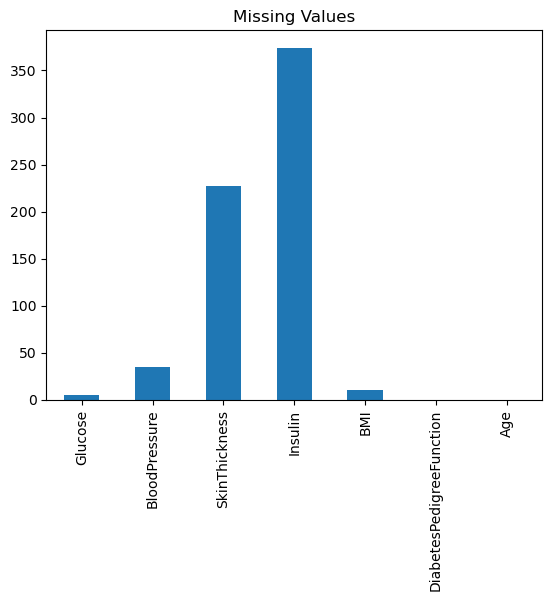

In [5]:
missing_values = ["n/a", "0", "na", "--"]
data2 = pd.read_csv('datasets\diabetes.csv', na_values = missing_values)

#Not all columns should be checked for missing values so I excluded Pregnancies and Outcome 
missing = pd.Series(data2[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']].isnull().sum())
print(missing)

missing.plot.bar()
plt.title('Missing Values')


## *3.* Impute with scikit-learn

#### Is it normal that people's BMI is zero? or not? What about Glucose, and Blood Pressure?
#### There are various ways to handle missing values: deleting, dropping and imputation.
#### For this dataset it may be best to change the zero values into another reasonable value, such as mean or median. The only thing that can have zero value is **pregnancies**. 

#### **NOTE**! The outcome is the class and it is therefore left out of the cleaning process

Imputation is the replacing of missing data with some substitute value to retain most of the information of the dataset

In [6]:
data_imputed = data.copy()
column = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
df_part = pd.DataFrame(column)
df_part.replace(0, np.nan, inplace = True)

#Imputation step 
imp = SimpleImputer(missing_values = np.nan , strategy='mean', copy = False)
imp.fit(df_part)
imp.transform(df_part)

df_converted = pd.DataFrame(df_part, columns=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"])


data_imputed[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df_converted[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]
data_imputed.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# if you successfuly finished the imputation for task3, uncomment the following:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *4.* Plotting

### a.	Boxplots

#### Here I visualize 4 boxplots in 1 figure for the following attributes: Glucose, BloodPressure, Insulin, BMI`

Text(0.5, 1.0, 'BMI')

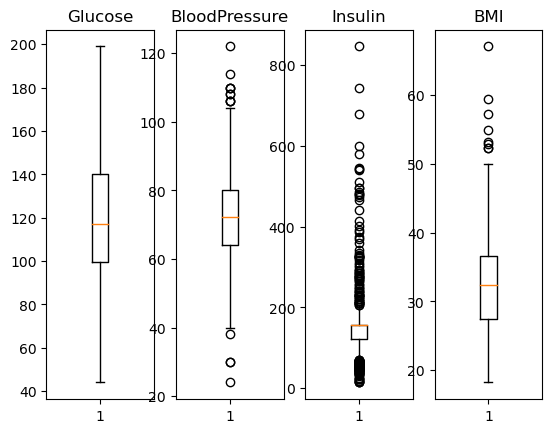

In [9]:
fig, ax = plt.subplots(1, 4)
ax[0].boxplot(data_imputed['Glucose'])
ax[0].set_title('Glucose')

ax[1].set_title('BloodPressure')
ax[1].boxplot(data_imputed['BloodPressure'])

ax[2].boxplot(data_imputed['Insulin'])
ax[2].set_title('Insulin')

ax[3].boxplot(data_imputed['BMI'])
ax[3].set_title('BMI')


### b.	Pregnancies by class 

#### Here I plot the Pregnancies attribute in relation to the class (Outcome) using a grouped barplot`


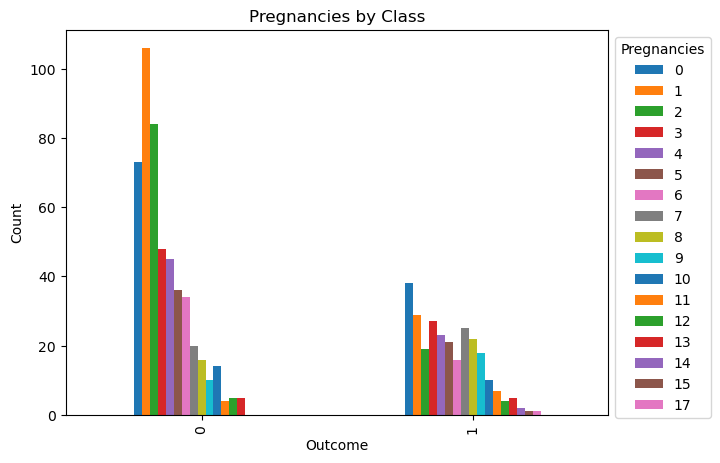

In [10]:
pregnancies_by_class = data_imputed.groupby('Outcome').Pregnancies.value_counts().unstack()

ax = pregnancies_by_class.plot(kind='bar', figsize=(7, 5),title = 'Pregnancies by Class', ylabel = 'Count')
ax.legend(title='Pregnancies',bbox_to_anchor=(1, 1), loc='upper left')


### c.	Age by class 

#### Here I plot the Age attribute in groups of 10 years in relation to the class (Outcome)`


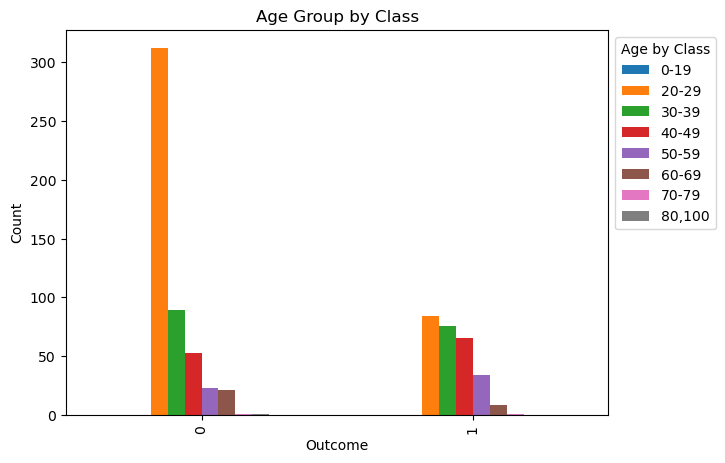

In [11]:
# I create age bins to group the ages
bins = 0, 19, 29, 39, 49, 59, 69, 79,100
data_imputed['age_bins'] = pd.cut(data_imputed.Age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80,100'])

#groupby
age_by_class = data_imputed.groupby('Outcome').age_bins.value_counts().unstack()

#plotting
ax = age_by_class.plot(kind='bar', figsize=(7, 5), title = 'Age Group by Class', ylabel = 'Count')
ax.legend(title='Age by Class',bbox_to_anchor=(1, 1), loc='upper left')


In [12]:
#dropping the previously created column 'age_bins'
data_imputed.drop(['age_bins'], axis = 1, inplace = True)

In [13]:
data_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### d.	Pairplot

#### Here I make a pairplot of all the numerical values of the dataset using seaborn

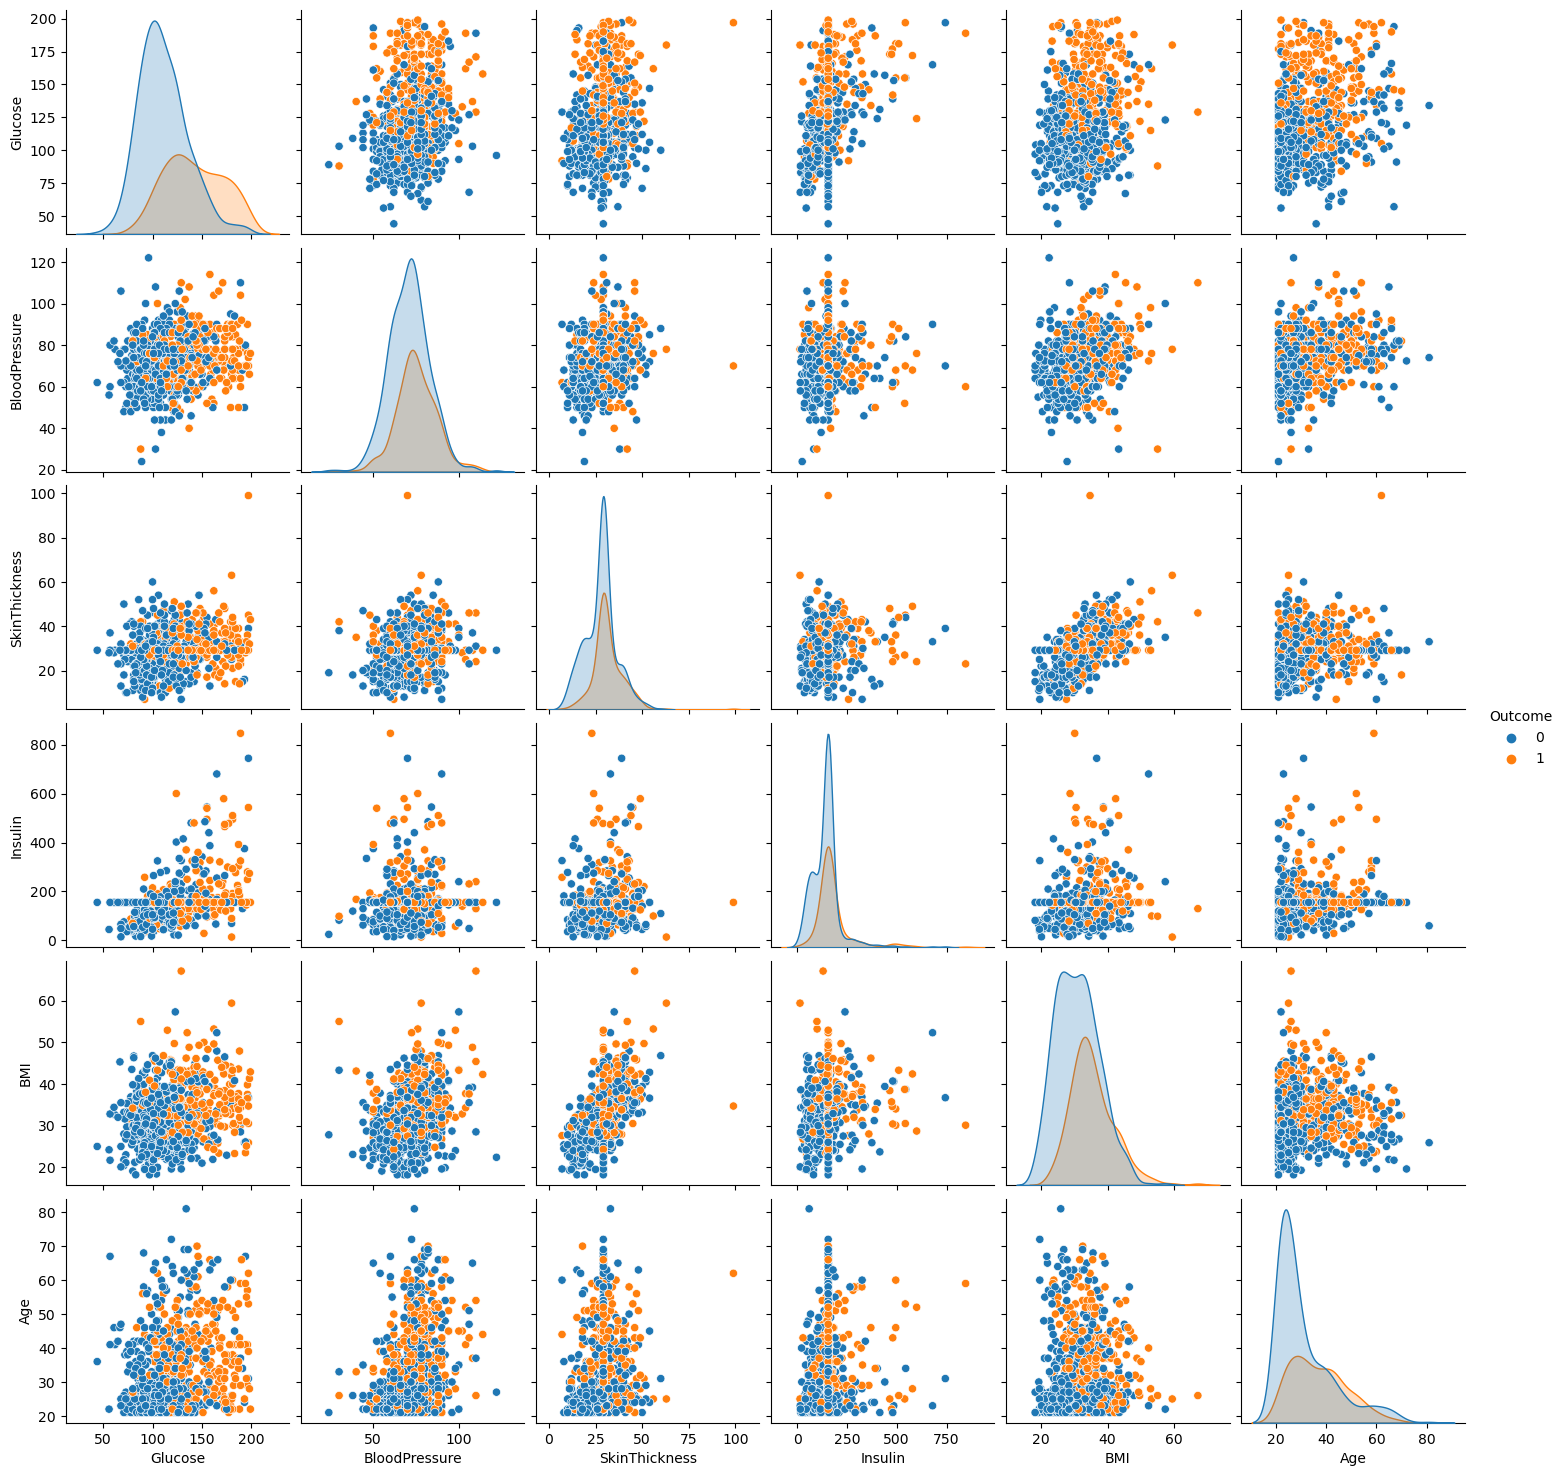

In [14]:
sns.pairplot(data_imputed[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 'Age','Outcome']], hue = 'Outcome')


## *5.* Standardization

#### Standardization transforms data to have a mean of zero and a standard deviation of 1. 

#### It is a crucial step before performing PCA, since we are interested in the components that maximize the variance. 

#### NOTE! Outcome is the class of the dataset indicating if a patient is healthy or has diabetes. As such, it is not included in the standardization. 

In [15]:
#importing standardscaler
from sklearn.preprocessing import StandardScaler

#focusing on specific columns for standardization
numerical = ['Pregnancies',"Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 'DiabetesPedigreeFunction','Age']
data = data_imputed[numerical]

#standadization
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
data_standardized = pd.DataFrame(data_standardized, columns = numerical)

#class is stored in valuable y
y = data_imputed['Outcome']


In [16]:
#A look at the stanardized dataset
data_standardized.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [17]:
#A look at the class 'Outcome'

y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## *6.* Dimensionality Reduction

### a. PCA plotting

#### Here, I reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component Analysis. 
#### I also print the explained variance ratio and create a dataframe with all the principal components. `

In [18]:

# importing PCA
from sklearn.decomposition import PCA

#fitting and transforming the standardized dataset
pca = PCA(n_components = 2, random_state = RSEED)
pca_df = pca.fit_transform(data_standardized)

#storing the pca components in a dataframe
df_principal_components = pca.components_
df_principal_components = pd.DataFrame(df_principal_components, columns = numerical)

In [19]:
df_principal_components

#The first row corresponds to the first PCA and the second row corresponds to the second PCA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.308371,0.421065,0.378498,0.390485,0.320583,0.390827,0.146564,0.393539
1,-0.552069,0.068170,-0.139202,0.347245,0.152909,0.437935,0.271494,-0.511603


Below we visualize the returned array after doing PCA. We use the class label 'Outcome' to visualize patients in the two groups Healthy and Diabetes

Text(0, 0.5, 'Second PCA')

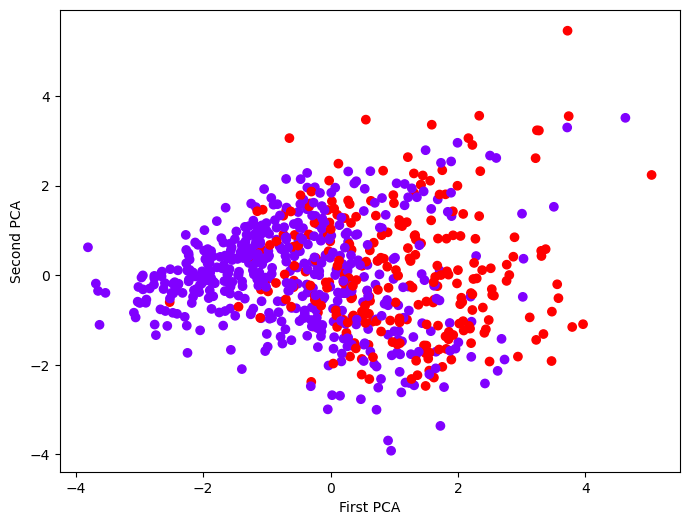

In [20]:
plt.figure(figsize = (8,6))
plt.scatter(x=pca_df[:,0], y = pca_df[:, 1], c= y, cmap ='rainbow')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

#This tells us the information retained during the transformation to 2 principal components

array([0.28750131, 0.18411087])

### b. 	Heatmap

#### Her I use seaborn to plot the heatmap of df_principal_components.

<AxesSubplot:>

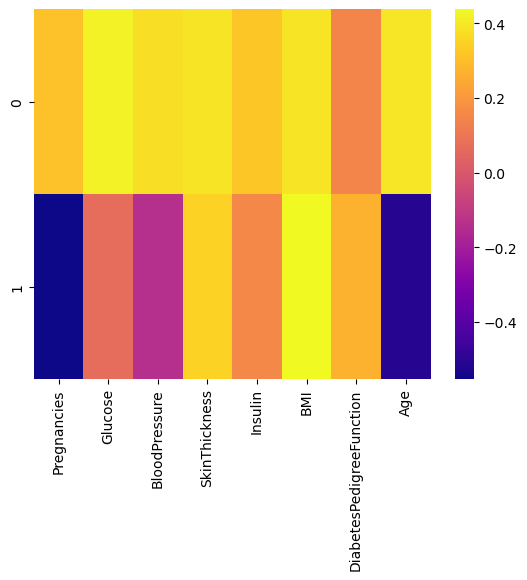

In [22]:
sns.heatmap(df_principal_components, cmap = 'plasma')   


## *7.* Multi-Dimensional Scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities (or planets at a particular point in time) or the similarity among groups of people (voters, patients etc). 

Below I apply Multi-Dimensional Scaling in our patient dataset using two different versions of the MDS sklearn algorithm. 

I will focus on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform. 

More [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)


### a. Multi-Dimensional Scaling, dissimilarity='euclidean'

#### I apply MDS on the data_standardized with n_components=2 and dissimilarity='euclidean' and plot the 2 resulting coordinates with colors respective to the class label.`

In [23]:
#import MDS
from sklearn.manifold import MDS

#Fit and transform the standardized dataset
mds = MDS(n_components = 2, random_state = RSEED, dissimilarity = 'euclidean')
mds_df = mds.fit_transform(data_standardized)

mds_df

array([[-0.12285467,  1.79329716],
       [-0.48300902, -1.50671556],
       [-2.5678784 ,  1.00016869],
       ...,
       [-1.07935283, -0.61273767],
       [-0.85726751, -0.16667644],
       [ 0.26995829, -1.3868661 ]])

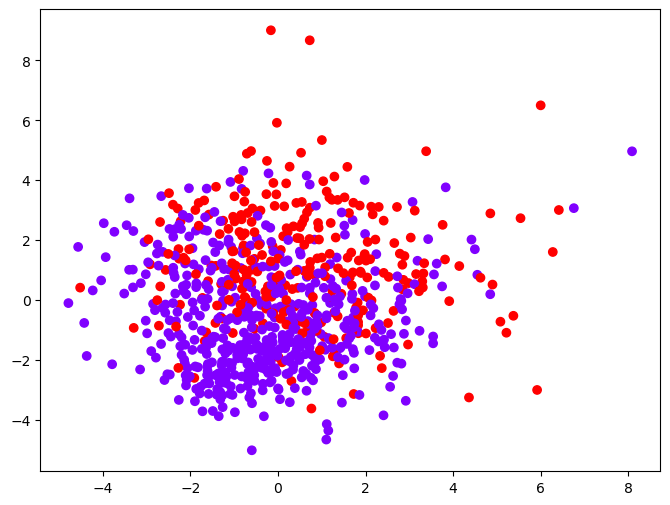

In [24]:
#Plot the resulting coordinates with colors respective to the class (Outcome)

plt.figure(figsize = (8,6))
plt.scatter(x=mds_df[:,0], y = mds_df[:, 1], c= y, cmap ='rainbow')

###  b. Multi-Dimensional Scaling with distances

#### Here I compute the pairwise distances between observations using the euclidean metric. Apply MDS on the custom matrix with the pairwise distances with n_components=2 and dissimilarity='precomputed'. Plot the results with colors respective to the class label. 


In [25]:
#computing the pairwise distances between observations using the euclidean metric
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(data_standardized)

#creating MDS object
mds = MDS(n_components = 2, random_state = RSEED,dissimilarity = 'precomputed')

#fitting and transforming the data
dist_df = mds.fit_transform(dist)
dist_df


array([[-0.12285467,  1.79329716],
       [-0.48300902, -1.50671556],
       [-2.5678784 ,  1.00016869],
       ...,
       [-1.07935283, -0.61273767],
       [-0.85726751, -0.16667644],
       [ 0.26995829, -1.3868661 ]])

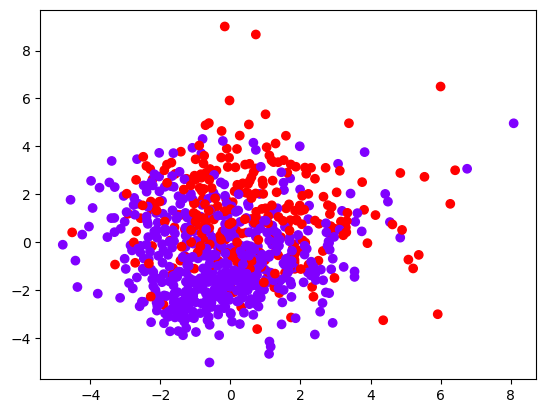

In [26]:
#plotting
plt.scatter(x=dist_df[:,0], y = dist_df[:, 1], c= y, cmap ='rainbow')